<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#Логистическая-регрессия" data-toc-modified-id="Логистическая-регрессия-3.3.1"><span class="toc-item-num">3.3.1&nbsp;&nbsp;</span>Логистическая регрессия</a></span></li><li><span><a href="#Дерево-решений" data-toc-modified-id="Дерево-решений-3.3.2"><span class="toc-item-num">3.3.2&nbsp;&nbsp;</span>Дерево решений</a></span></li><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.3.3"><span class="toc-item-num">3.3.3&nbsp;&nbsp;</span>Случайный лес</a></span></li></ul></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [2]:
#импортируем необходимые библиотеки
import pandas as pd 
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

import warnings
warnings.filterwarnings('ignore')

In [3]:
#откроем файл с данными
df = pd.read_csv('/datasets/Churn.csv')
#изучим полученные данные
display(df.head())


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [4]:
#изучим датасет
def uni_function(function):
    display(function.info())
    display(function.isna().sum())
    display(function.describe())
    display(function.duplicated().sum())
uni_function(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


None

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


0

По результатам изучения данных, нам необходимо:
1. привести названия столбцов к «змеиному_регистру»;
2. удалить неважные для данной задачи столбцы;
3. проанализировать, какую долю составляют пропуски в столбце Tenure и решить, как с ними поступить.

In [5]:
#приведем столбцы к нижнему регистру
df.columns = map(str.lower, df.columns)
display(df.columns)

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [6]:
#переименуем столбцы
df = df.rename(columns={'rownumber': 'row_number', 
                        'creditscore': 'credit_score',
                       'numofproducts': 'num_of_products',
                       'hascrcard': 'has_cr_card',
                       'isactivemember': 'is_active_member',
                       'estimatedsalary': 'estimated_salary'})
display(df.columns)

Index(['row_number', 'customerid', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [7]:
# удалим row_number и surname - тк никакой информации для определения уйдет клиент или нет они не несут,
df = df.drop(['row_number', 'surname', 'customerid'] , axis=1)
display(df.columns)


Index(['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_cr_card', 'is_active_member',
       'estimated_salary', 'exited'],
      dtype='object')

In [8]:
#проверим долю пропущенных значений в столбце Tenure
pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
credit_score,0.000000
geography,0.000000
gender,0.000000
age,0.000000
tenure,9.090000
balance,0.000000
num_of_products,0.000000
has_cr_card,0.000000
is_active_member,0.000000
estimated_salary,0.000000


Доля пропусков в столбце tenure составляет 9,09%. Удаление строк с пропущенными значениями приведет к потере данных и искажению результатов. Заменим пропущенные значения нулями, предполагая, что клиент пользуется услугами банка меньше года.

In [9]:
df['tenure'] = df['tenure'].fillna(0)
#pd.DataFrame(round((df.isna().mean()*100),2)).style.background_gradient('coolwarm')

In [10]:
#преобразуем категориальные признаки в численные с помощью техники OHE
df = pd.get_dummies(data=df, columns=['geography', 'gender'], drop_first=True)
display(df.head())

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


Данные подготовлены, можем переходить к исследованию задачи

## Исследование задачи

Цель: исследовать баланс классов, обучить модель без учёта дисбаланса. Кратко описать выводы.

Целевым признаком является столбец 'exited' - факт ухода клиента: "да" - 1, "нет" - 0. Значит предстоит решить задачу классификации. Для этого воспользуемся логистической регрессией.

In [11]:
#Сохраним признаки в отдельные переменные
features = df.drop(['exited'], axis=1) # извлечем признаки
target = df['exited'] # извлечем целевой признак
print(features.shape)

(10000, 11)


In [12]:
#разделите данные на обучающую и тестовую выборки 
features_train, features_test, target_train, target_test = train_test_split(
        features, target, test_size=0.4,train_size=0.6, random_state = 12345)
#разделите данные на обучающую и валидационную выборки 
features_test, features_valid, target_test, target_valid = train_test_split(
        features_test, target_test, test_size=0.5, random_state = 12345)
print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


###  Логистическая регрессия

In [13]:
#применим метод масштабирования — стандартизация данных
numeric = ['credit_score', 'age', 'tenure', 'balance', 'num_of_products', 'estimated_salary']
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
display(features_train.head())

/tmp/ipykernel_1511/690685240.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,geography_Germany,geography_Spain,gender_Male
7479,-0.886751,-0.373192,1.104696,1.232271,-0.891560,1,0,-0.187705,0,1,1
3411,0.608663,-0.183385,1.104696,0.600563,-0.891560,0,0,-0.333945,0,0,0
6027,2.052152,0.480939,-0.503694,1.027098,0.830152,0,1,1.503095,1,0,1
1247,-1.457915,-1.417129,0.461340,-1.233163,0.830152,1,0,-1.071061,0,0,1
3716,0.130961,-1.132419,-0.825373,1.140475,-0.891560,0,0,1.524268,1,0,0


In [14]:
best_model = None
best_iters = 0 
best_result = 0
for iters in range(1, 100):
    model = LogisticRegression(random_state=12345,solver='liblinear', max_iter=100)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result = f1_score(target_valid, predictions_valid)
    if result > best_result:
        best_model = model
        best_result = result
        best_iters = iters

print("F1-мера наилучшей модели на валидационной выборке:", best_result)
print(best_model)
print(best_iters)

F1-мера наилучшей модели на валидационной выборке: 0.2743055555555555
LogisticRegression(random_state=12345, solver='liblinear')
1


AUC: 0.738656005132887


0    0.9235
1    0.0765
dtype: float64

<AxesSubplot:>

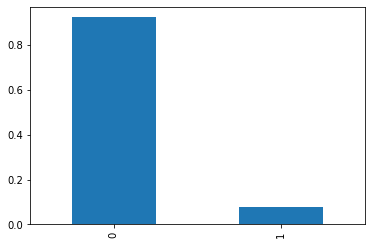

In [15]:
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)

#Найдим значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc)

display(class_frequency)
class_frequency.plot(kind='bar') 

### Дерево решений

In [16]:
best_model = None
best_result = 0
best_depth = 0
for depth in range(1, 11, 1):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # обучим модель с заданной глубиной дерева
    model.fit(features_train,target_train) # обучим модель вызовом метода fit()
    predictions_valid = model.predict(features_valid) # получим предсказания модели
    result = f1_score(target_valid, predictions_valid) # посчитаем качество модели
    if result > best_result:
        best_model = model
        best_result = result
        best_depth = depth
        
print("F1-мера наилучшей модели на валидационной выборке:",best_result)
print ('Оптимальная глубина деревьев:',best_depth)
print(best_model)

F1-мера наилучшей модели на валидационной выборке: 0.53781512605042
Оптимальная глубина деревьев: 9
DecisionTreeClassifier(max_depth=9, random_state=12345)


AUC: 0.7843565377598487


0    0.8545
1    0.1455
dtype: float64

<AxesSubplot:>

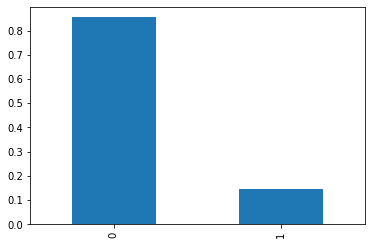

In [17]:
#Проанализируем частоты классов в результатах предсказаний решающего дерева
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_train, target_train)
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)

#Найдим значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)


#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc)

display(class_frequency)
class_frequency.plot(kind='bar') 


### Случайный лес

In [18]:
best_model = None
best_result = 0
for est in range(1, 100, 1):
    for depth in range(1, 11, 1):
        model = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth) # обучим модель с заданным количеством деревьев
        model.fit(features_train,target_train) # обучим модель на тренировочной выборке
        predictions_valid = model.predict(features_valid) # получим предсказания модели
        result = f1_score(target_valid, predictions_valid)
        if result > best_result:
            best_model = model # сохраним наилучшую модель
            best_result = result # сохраним наилучшее значение метрики accuracy на валидационных данных
            best_est = est # наилучшее количество деревьев

print("F1-мера наилучшей модели на валидационной выборке:", best_result)
print ('Оптимальная глубина деревьев:', best_depth)
print ('Оптимальное количество деревьев:', best_est)
print(best_model)

F1-мера наилучшей модели на валидационной выборке: 0.5306748466257668
Оптимальная глубина деревьев: 9
Оптимальное количество деревьев: 18
RandomForestClassifier(max_depth=9, n_estimators=18, random_state=12345)


AUC: 0.8489043894877755


0    0.8855
1    0.1145
dtype: float64

<AxesSubplot:>

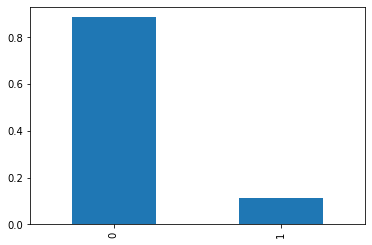

In [19]:
#Проанализируем частоты классов в результатах предсказаний случайного леса
model = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9)
model.fit(features_train, target_train)
# чтобы работала функция value_counts(),
# мы преобразовали результат к pd.Series 
predicted_valid = pd.Series(model.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=True)

#Найдим значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc)

display(class_frequency)
class_frequency.plot(kind='bar')  


**Вывод**

Мы обучили модель тремя различными алгоритмами: 
1. логистической регрессией
2. деревом решений
3. слечайным лесом.

Определили значения F1-меры наилучшей модели:
- для логистической регрессии F1 = 0.27;
- для дерева решений F1 = 0.53;
- для случайного леса F1 = 0.53.

Рассчитали показатель AUC. Как известно, разумное значение AUC должно быть > 0.5. У хорошей модели классификации показатель AUC > 0.9, но это значение сильно зависит от сферы ее применения. В нашем случае:
- для логистической регрессии AUC = 0.73;
- для дерева решений AUC = 0.78;
- для случайного леса AUC = 0.84.    
Полученные значения больше 0.5, а значит мы можем считать нашу модель адекватной.

После этого проверили каждую модель на адекватность, используя оптимальные значения для кадлой модели. По результатам проверки, мы можем сделать вывод о том, что в настоящее время все три модели работают плохо. Мы видим, что все модели несбалансированы, соотношения между классами далеко не 1:1. 

## Борьба с дисбалансом

Для решения проблемы дисбаланса классов, есть три способа:
- Использовать аргумент class_weight;
- Увеличить выборку.
- Уменьшить выборку.   

###  Взвешивание классов

#### Логистическая регрессия

In [20]:
#сделаем веса классов сбалансированными
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_wl = f1_score(target_valid, predicted_valid)
print("F1:", f1_wl)

#Найдим значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc_wl = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc_wl)

F1: 0.4797238999137188
AUC: 0.7417876058170719


#### Дерево решений

In [21]:
#сделаем веса классов сбалансированными
model = DecisionTreeClassifier(random_state=12345, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_wt = f1_score(target_valid, predicted_valid)
print("F1:", f1_wt)

#Найдим значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc_wt = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc_wt)

F1: 0.5458015267175572
AUC: 0.7679962102984541


#### Случайный лес

In [22]:
#сделаем веса классов лучшей модели сбалансированными
model = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
f1_wf = f1_score(target_valid, predicted_valid)
print("F1:", f1_wf )

#Найдём значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc_wf = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc)

F1: 0.58
AUC: 0.8489043894877755


In [23]:
#создадим сводную таблицу
weight = pd.DataFrame([['LogisticRegression',f1_wl, auc_roc_wl],
                  ['DecisionTreeClassifier',f1_wt, auc_roc_wt],
                  ['RandomForestClassifier',f1_wf, auc_roc_wf]], 
columns = ['model','F1-мера', 'AUC-ROS'])


### Увеличение выборки

In [24]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 10)


#### Логистическая регрессия

In [25]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1_up_l = f1_score(target_valid, predicted_valid)
print("F1:", f1_up_l)

#Найдём значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc_up_l = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc_up_l)

F1: 0.43009545199326216
AUC: 0.742769510292008


#### Дерево решений

In [26]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1_up_t = f1_score(target_valid, predicted_valid)
print("F1:", f1_up_t)

#Найдём значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc_up_t = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc_up_t)

F1: 0.5166279969064191
AUC: 0.7841234291402265


#### Случайный лес

In [27]:
model = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9, class_weight='balanced')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)
f1_up_f = f1_score(target_valid, predicted_valid)
print("F1:", f1_up_f)

#Найдём значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc_up_f = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc_up_f)

F1: 0.6116910229645094
AUC: 0.8503959848351974


In [28]:
#создадим сводную таблицу
upsamp = pd.DataFrame([['LogisticRegression',f1_up_l, auc_roc_up_l],
                  ['DecisionTreeClassifier',f1_up_t, auc_roc_up_t],
                  ['RandomForestClassifier',f1_up_f, auc_roc_up_f]], 
columns = ['model','F1-мера', 'AUC-ROS'])


### Уменьшение выборки

In [29]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
            [features_zeros.sample(frac=0.1, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
            [target_zeros.sample(frac=0.1, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)

    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.1)


#### Логистическая регрессия

In [30]:
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1_down_l = f1_score(target_valid, predicted_valid)
print("F1:", f1_down_l)

#Найдём значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc_down_l = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc_down_l)

F1: 0.4305239179954442
AUC: 0.7358631989698248


#### Дерево решений

In [31]:
model = DecisionTreeClassifier(random_state=12345, max_depth=9)
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1_down_t = f1_score(target_valid, predicted_valid)
print("F1:", f1_down_t)

#Найдём значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc_down_t = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc_down_t)

F1: 0.4752877454299255
AUC: 0.7272291854989948


#### Случайный лес

In [32]:
model = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9, class_weight='balanced')
model.fit(features_downsampled, target_downsampled)
predicted_valid = model.predict(features_valid)
f1_down_f = f1_score(target_valid, predicted_valid)
print("F1:", f1_down_f)

#Найдём значения вероятностей классов для валидационной выборки
probabilities_valid = model.predict_proba(features_valid)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc_down_f = roc_auc_score(target_valid, probabilities_valid[:, 1])
print('AUC:', auc_roc_down_f)

F1: 0.5235294117647059
AUC: 0.8178252389925511


In [33]:
#создадим сводную таблицу
downsamp = pd.DataFrame([['LogisticRegression',f1_down_l, auc_roc_down_l],
                  ['DecisionTreeClassifier',f1_down_t, auc_roc_down_t],
                  ['RandomForestClassifier',f1_down_f, auc_roc_down_f]], 
columns = ['model','F1-мера', 'AUC-ROS'])


In [34]:
display(weight) #сводная таблица взвешивание классов
display(upsamp) # сводная таблица увеличение выборки
display(downsamp) #сводная таблица уменьшение выборки

,model,F1-мера,AUC-ROS
0,LogisticRegression,0.479724,0.741788
1,DecisionTreeClassifier,0.545802,0.767996
2,RandomForestClassifier,0.580000,0.843894


,model,F1-мера,AUC-ROS
0,LogisticRegression,0.430095,0.742770
1,DecisionTreeClassifier,0.516628,0.784123
2,RandomForestClassifier,0.611691,0.850396


,model,F1-мера,AUC-ROS
0,LogisticRegression,0.430524,0.735863
1,DecisionTreeClassifier,0.475288,0.727229
2,RandomForestClassifier,0.523529,0.817825


**Вывод**
Делая вывод, мы будем опираться на то, что главная разница между мерой F1 и ROC AUC заключается в том, что первый принимает предсказанные классы, а второй принимает предсказанные оценки в качестве входных данных. Из-за этого с оценкой F1 нам нужно выбрать порог, который назначает ваши наблюдения этим классам. Часто мы можем значительно улучшить производительность нашей модели, если хорошо ее выберем. Соотвественно, нужно выбрать модель с большим значением F1.
Исходя из полученных данных можно сделать вывод о том, что лучшей моделью является RandomForestClassifier и методом борьбы с дисбалансом - увеличение выборки.

## Тестирование модели

In [35]:
model = RandomForestClassifier(random_state=12345, n_estimators=18, max_depth=9, class_weight='balanced')
model.fit(features_train, target_train)
test_predictions = model.predict(features_test) # код расчёта на тестовой выборке

test_f1 = f1_score(target_test, test_predictions)

print("F1 наилучшей модели на тестовой выборке:", test_f1)

#Найдём значения вероятностей классов для валидационной выборки
probabilities_test = model.predict_proba(features_test)

#посчитаем AUC-ROC для выяснения, как сильно наша моель отличается от случайной
auc_roc = roc_auc_score(target_test, probabilities_test[:, 1])
print('AUC:', auc_roc)

F1 наилучшей модели на тестовой выборке: 0.6139954853273137
AUC: 0.8480014396409368


**Итоги**
По результатам тестирования нам удалось достичь значения F1-меры 0.61.